# Homework 6

## Question 3: Random Forest and SVM for spam classifier

### Import Data and Packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv("spambase.data", header = None) # https://archive.ics.uci.edu/ml/datasets/Spambase
display(data.head())  ## last column is whether spam (1) or ham (0)

## Separate out labels from data
labels = data.iloc[:, -1]
display(labels.shape)
data = data.iloc[:, :-1]
print(data.shape)


## Count missing values
print(data.isnull().sum().sum())

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


(4601,)

(4601, 57)
False


### Split Data

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, train_size=0.80, random_state= 100)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(3680, 57) (921, 57) (3680,) (921,)


### CART Model and classification tree

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

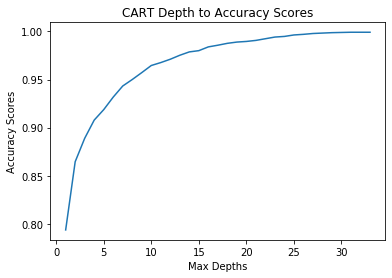

In [26]:
deps = np.asarray(range(1,34))
scores = []
for i in range(1,34):
    clf = DecisionTreeClassifier(max_depth = i, random_state = 100).fit(data, labels)
    scores.append(clf.score(data, labels))
plt.plot(deps, scores)
plt.xlabel("Max Depths")
plt.ylabel("Accuracy Scores")
plt.title("CART Depth to Accuracy Scores")
plt.show()

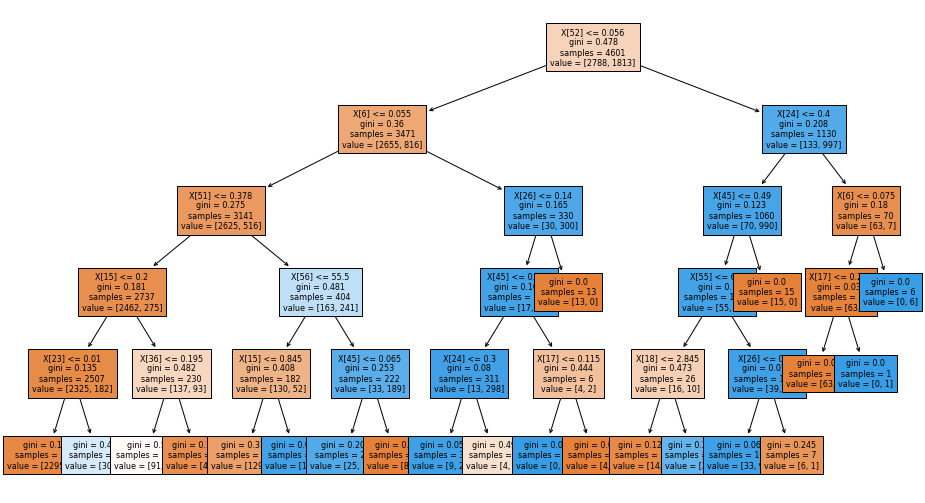

Max Depth:
5

Accuracy Score:
0.9187133231906107


In [188]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 100).fit(data, labels)
fig, ax = plt.subplots(figsize=(16, 9))
plot_tree(clf,fontsize= 8,  filled=True)
plt.show()
print("Max Depth:")
print(clf.get_depth())
print()
print("Accuracy Score:")
print(clf.score(data, labels))

### CART with Split Data

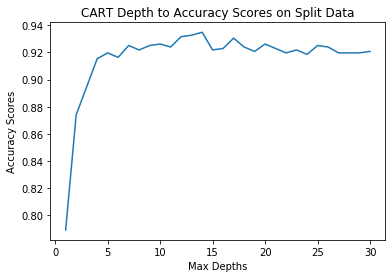

In [46]:
deps = np.asarray(range(1,31))
scores = []
for i in range(1,31):
    clf = DecisionTreeClassifier(max_depth = i, random_state = 100).fit(xtrain, ytrain)
    scores.append(clf.score(xtest, ytest))
plt.plot(deps, scores)
plt.xlabel("Max Depths")
plt.ylabel("Accuracy Scores")
plt.title("CART Depth to Accuracy Scores on Split Data")
plt.show()

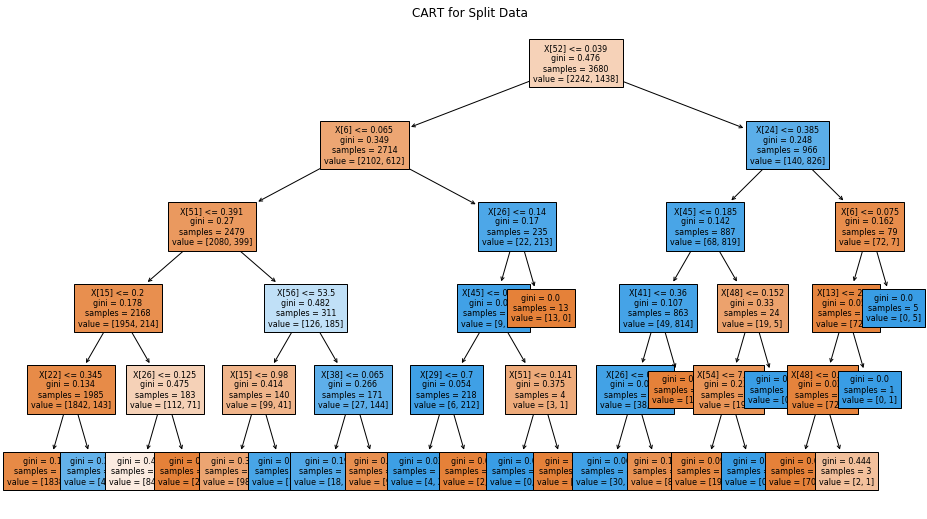

Max Depth:
5

Accuracy Score:
0.9196525515743756
0.08034744842562436


In [189]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 100).fit(xtrain, ytrain)
fig, ax = plt.subplots(figsize=(16, 9))
plot_tree(clf, fontsize=8, filled=True)
plt.title("CART for Split Data")
plt.show()
print("Max Depth:")
print(clf.get_depth())
print()
print("Accuracy Score:")
print(clf.score(xtest, ytest))
tree_score = 1- clf.score(xtest, ytest)
print(tree_score)

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

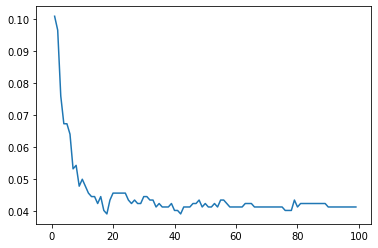

In [72]:
trees = np.asarray(range(1,100))
scores = []
for i in range(1,100):
    clf = RandomForestClassifier(n_estimators = i, random_state = 100).fit(xtrain, ytrain)
    scores.append(1 - clf.score(xtest, ytest))

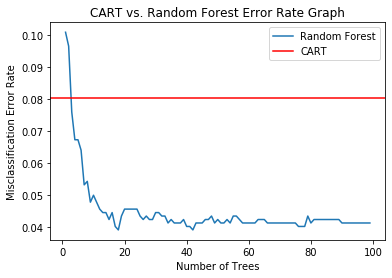

In [82]:
plt.figure()
plt.plot(trees, scores, label = "Random Forest")
plt.axhline(y= tree_score, color = 'r', label = "CART")
plt.xlabel("Number of Trees")
plt.ylabel("Misclassification Error Rate")
plt.title("CART vs. Random Forest Error Rate Graph")
plt.legend()
plt.show()

In [81]:
clf = RandomForestClassifier(n_estimators = 18, random_state = 100).fit(xtrain, ytrain)
print("Random Forest Accuracy Score:")
print(clf.score(xtest, ytest))
print()
print("Random Forest Misclassification Error:")
print(1- clf.score(xtest, ytest))
print()
print("CART Accuracy Score:")
print(1-tree_score)
print()
print("CART Misclassification Error:")
print(tree_score)

Random Forest Accuracy Score:
0.9609120521172638

Random Forest Misclassification Error:
0.039087947882736174

CART Accuracy Score:
0.9196525515743756

CART Misclassification Error:
0.08034744842562436


### SVM

In [137]:
from sklearn.svm import OneClassSVM

In [134]:
## Extract Non-Spam Emails
ham = []
ham_rows = []

ytrain = np.asarray(ytrain)
print(ytrain.shape)
count = 0
for i in range(len(ytrain)):
    if ytrain[i] == 0:
        count += 1
        ham_rows.append(i)
for i in ham_rows:
    ham.append(xtrain.iloc[i])
ham = pd.DataFrame(ham)
print(ham.shape)

(3680,)
2242
2242
(3680, 57)
(2242, 57)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [165]:
## Fit SVM
clf = OneClassSVM(nu = .3, kernel='rbf', gamma = 'scale').fit(ham)
train_pred = clf.predict(ham)
test_pred = clf.predict(xtest)

n_error_train = train_pred[train_pred == -1].size
n_error_test = test_pred[test_pred == -1].size

In [166]:
## Score SVM
print("One Class SVM Misclassification Error Score:")
print("Training Error:")
print(n_error_train/count)
print("Training Accuracy Score:")
print( 1-n_error_train/count)
print()
print("Testing Error:")
print(n_error_test/len(ytest))
print("Test Accuracy Score:")
print(1-n_error_test/len(ytest))

One Class SVM Misclassification Error Score:
Training Error:
0.30017841213202495
Training Accuracy Score:
0.699821587867975

Testing Error:
0.33659066232356133
Test Accuracy Score:
0.6634093376764387
